# SAIRAJ NITIN GONDKAR

# GRIP : The Sparks Foundation

# Task 1 : Prediction Using Supervised ML

***In this task we have to predict the percentage score of a student based on the number of hours studied. The task has 2 variables where the feature is no. of hours studied and target value is the percentage score. This can be solved using Simple Linear Regression.***

In [111]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading data from remote URL**

In [112]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

**Exploring Data**

In [113]:
print(data.shape)

(25, 2)


In [114]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [115]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [116]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Check for null Values**

In [118]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Scatter Plot

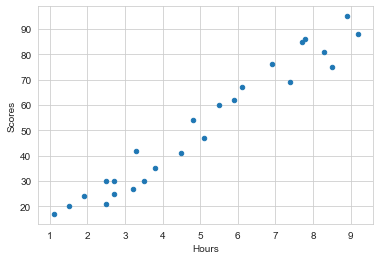

In [119]:
data.plot(kind='scatter',x='Hours',y='Scores')
plt.show()

Correlation Matrix

In [120]:
corr = data.corr()
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

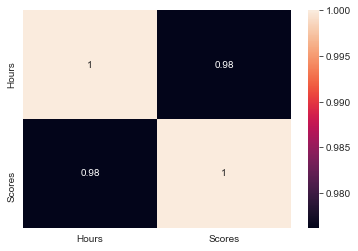

In [121]:
sns.heatmap(corr,annot=True)

**EDA**

In [122]:
hours = data['Hours']
scores = data['Scores']

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

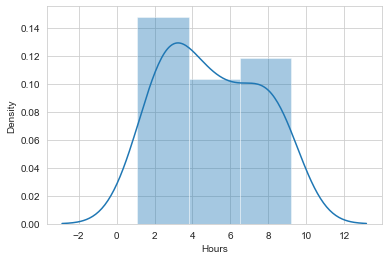

In [123]:
sns.distplot(hours)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

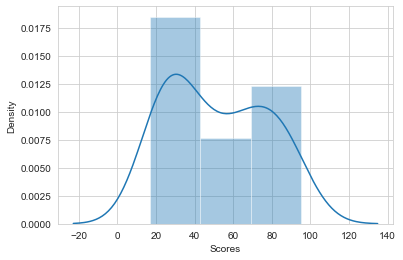

In [124]:
sns.distplot(scores)

# Linear Regression

In [125]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [126]:
print(X.shape)
print(y.shape)

(25, 1)
(25,)


In [127]:
print(X)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


**Train Test Split**

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [130]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(20, 1) (5, 1) (20,) (5,)


**Model Creation**

In [131]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [132]:
model.fit(X_train,y_train)

LinearRegression()

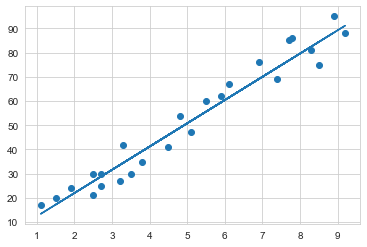

In [133]:
m = model.coef_
c = model.intercept_
line = m*X + c
plt.scatter(X, y)
plt.plot(X,line)
plt.show()

**Predcitions using Model**

In [134]:
y_pred = model.predict(X_test)

In [135]:
actual_predicted = pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


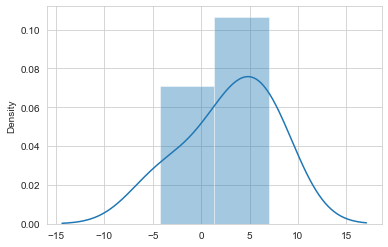

In [136]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

**What would be the predicted score if the student studies for 9.25 hours/day?**

In [137]:
h = 9.25
s = model.predict([[h]])
print("If a student studies for {} hours per day he/she will score {} % in exam !!".format(h,s[0]))

If a student studies for 9.25 hours per day he/she will score 91.56986604454477 % in exam !!


# **MODEL EVALUATION**

In [138]:
from sklearn import metrics
from sklearn.metrics import r2_score
print(" Mean Absolute Error:: ",metrics.mean_absolute_error(y_test,y_pred))
print(" R2 Score:: ",r2_score(y_test,y_pred))

 Mean Absolute Error::  4.5916495300630285
 R2 Score::  0.971014141329942
